In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"D:\Ciencia de Datos\7mo\Aprendizaje_automatico\Practicas\1\L1_alumnos\dataset_regresion_sintetico.csv")
y = df['y']
df.drop('y', axis=1, inplace=True)
df.head()

,x1,x2,x3,x4,x_noise
0,3.745401,6.810778,-0.757780,8.046248,5.931013
1,9.507143,19.246540,4.063544,6.077820,-3.095464
2,7.319939,14.932951,-3.888025,2.925508,3.261330
3,5.986585,11.258818,-0.073749,4.619323,-12.511136
4,1.560186,4.986147,-4.886464,3.248763,9.240270


In [6]:
def MSE(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

In [7]:
# ===== OLS robusto =====

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.2, random_state=42)

def ols_fit(X, y):
    X1 = np.c_[np.ones((X.shape[0], 1)), X]              # intercepto
    XtX = X1.T @ X1
    cond = np.linalg.cond(XtX)
    # Resolver con solve; si está muy mal condicionado, usar pinv
    theta = np.linalg.solve(XtX, X1.T @ y) if cond < 1e12 else (np.linalg.pinv(XtX) @ (X1.T @ y))
    return theta, cond

def ols_predict(X, theta):
    X1 = np.c_[np.ones((X.shape[0], 1)), X]
    return X1 @ theta

theta_ols, cond_ols = ols_fit(X_train.values, y_train.values)
yhat_tr = ols_predict(X_train.values, theta_ols)
yhat_te = ols_predict(X_test.values,  theta_ols)

print(f"Condición(XᵀX): {cond_ols:,.2e}")
print(f"MSE train: {MSE(y_train.values, yhat_tr):.4f}  |  MSE test: {MSE(y_test.values,yhat_te):.4f}")


Condición(XᵀX): 1.89e+03
MSE train: 22.5225  |  MSE test: 21.2742


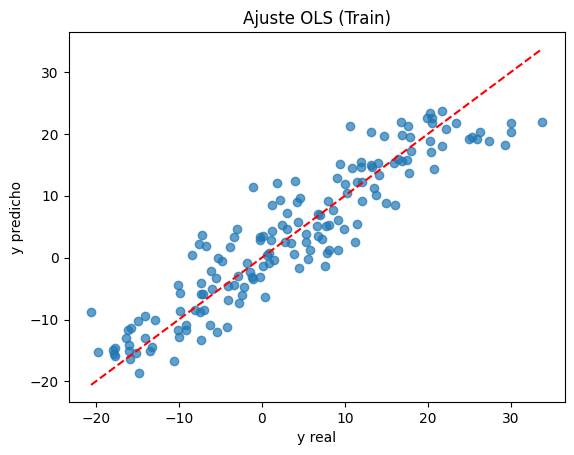

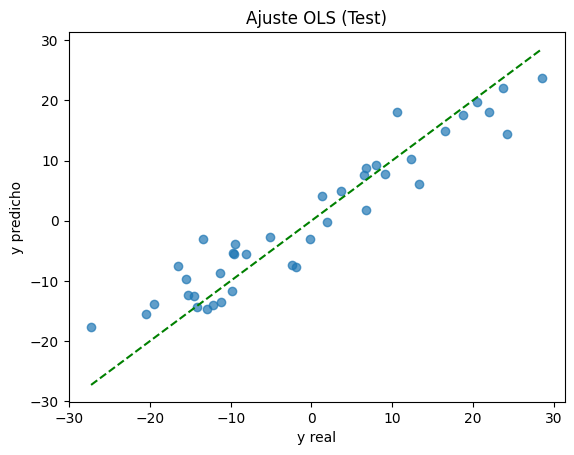

In [9]:
# Train
plt.scatter(y_train, yhat_tr, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "r--")
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.title("Ajuste OLS (Train)")
plt.show()

# Test
plt.scatter(y_test, yhat_te, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "g--")
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.title("Ajuste OLS (Test)")
plt.show()
